In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Take in the data and the error.
Then do some analysis on what cuts need to be done.

In [46]:
df=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data_full_ps_1')
err=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/err_full_ps_1')

Make a distance cut for everything to be less than 4000pc


In [47]:
df=df[10**((df['mu']+5)/5)<4000]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)

Also, we want to make a cut on the mu/err_mu.

In [48]:
df=df[err['mu_error']/df['mu']<0.01]
err=err.loc[df.index]

Plot as a function of distance to show the brightness of sources.
These are a few sources which are quite bright. Which seem to cause issues in the HR diagram. There is a high chance these could be binary stars. We will cut them out now
and later we will have to cut out these from the test set too as the underlying pdf doenst include extinction.

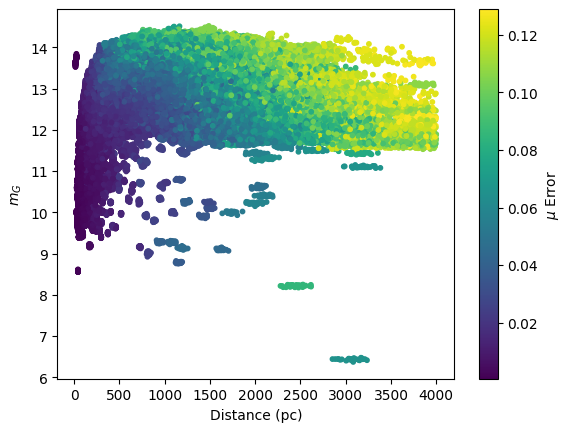

In [49]:
bprp=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
gk=df['g_mean_psf_mag']-df['ks_m']
scatter = plt.scatter(10**((df['mu']+5)/5),df['ks_m'], s=10, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'

# Add the colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('$\mu$ Error')  # Label for the colorbar

# Label axes
plt.xlabel('Distance (pc)')
plt.ylabel('$m_G$')

# Show plot
plt.show()

In [50]:
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)

df=df[df['phot_g_mean_mag']>13]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)

"""df=df[df['i_mean_psf_mag']>13.27]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)
df=df[df['r_mean_psf_mag']>13.27]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)

df=df[df['ks_m']>11.3]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)"""
df=df[df['ks_m']-df['mu']<10.0]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)
df=df[df['phot_bp_mean_mag']-df['phot_rp_mean_mag']>0.0]
err=err.loc[df.index]

Analyse the passbands that we will be using

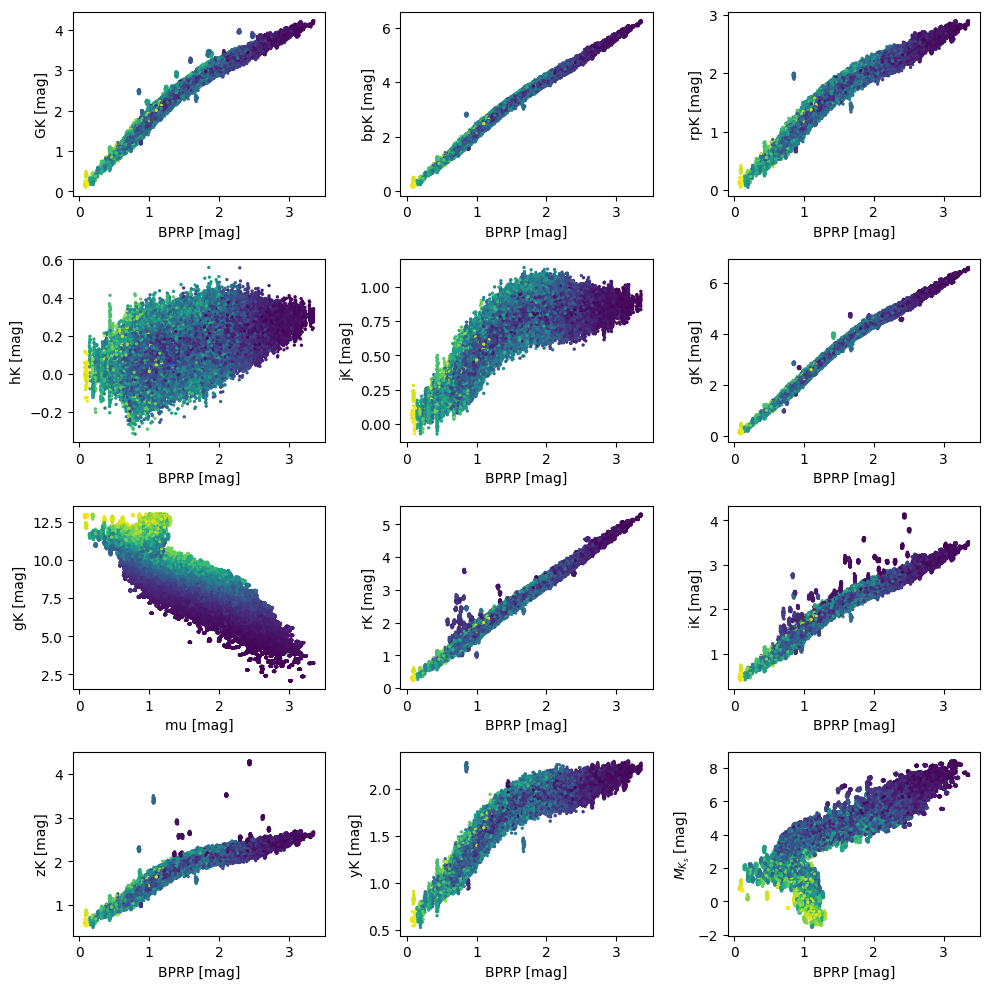

In [51]:
fig,axs=plt.subplots(4,3,figsize=(10,10))

d=10**((df['mu']+5)/5)
y=df['phot_g_mean_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[0,0].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[0,0].set_xlabel('BPRP [mag]')
axs[0,0].set_ylabel('GK [mag]')

y=df['phot_bp_mean_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[0,1].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[0,1].set_xlabel('BPRP [mag]')
axs[0,1].set_ylabel('bpK [mag]')
# Add the colorbar
y=df['phot_rp_mean_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[0,2].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[0,2].set_xlabel('BPRP [mag]')
axs[0,2].set_ylabel('rpK [mag]')

y=df['h_m']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[1,0].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[1,0].set_xlabel('BPRP [mag]')
axs[1,0].set_ylabel('hK [mag]')

y=df['j_m']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[1,1].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[1,1].set_xlabel('BPRP [mag]')
axs[1,1].set_ylabel('jK [mag]')
# Add the colorbar
y=df['g_mean_psf_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[1,2].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[1,2].set_xlabel('BPRP [mag]')
axs[1,2].set_ylabel('gK [mag]')


y=df['mu']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[2,0].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[2,0].set_xlabel('mu [mag]')
axs[2,0].set_ylabel('gK [mag]')

y=df['r_mean_psf_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[2,1].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[2,1].set_xlabel('BPRP [mag]')
axs[2,1].set_ylabel('rK [mag]')
# Add the colorbar
y=df['i_mean_psf_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[2,2].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[2,2].set_xlabel('BPRP [mag]')
axs[2,2].set_ylabel('iK [mag]')


y=df['z_mean_psf_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[3,0].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[3,0].set_xlabel('BPRP [mag]')
axs[3,0].set_ylabel('zK [mag]')

y=df['y_mean_psf_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[3,1].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[3,1].set_xlabel('BPRP [mag]')
axs[3,1].set_ylabel('yK [mag]')
# Add the colorbar
y=df['ks_m']-df['mu']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[3,2].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[3,2].set_xlabel('BPRP [mag]')
axs[3,2].set_ylabel('$M_{K_s}$ [mag]')

plt.tight_layout()
# Show plot
plt.show()

In [38]:
err.columns

Index(['Unnamed: 0', 'ks_msigcom', 'mu_error', 'g_error', 'bp_error',
       'rp_error', 'j_msigcom', 'h_msigcom', 'g_mean_psf_mag_error',
       'r_mean_psf_mag_error', 'i_mean_psf_mag_error', 'z_mean_psf_mag_error',
       'y_mean_psf_mag_error', 'ra_error', 'dec_error'],
      dtype='object')

In [42]:
df.columns

Index(['Unnamed: 0', 'ks_m', 'mu', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'j_m', 'h_m', 'g_mean_psf_mag', 'r_mean_psf_mag',
       'i_mean_psf_mag', 'z_mean_psf_mag', 'y_mean_psf_mag', 'ra', 'dec'],
      dtype='object')

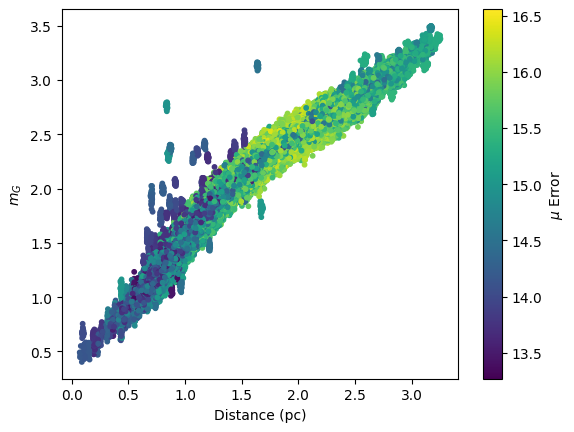

In [43]:
y=df['i_mean_psf_mag']-df['ks_m']
scatter = plt.scatter(x,y, s=10, c=df['i_mean_psf_mag'], cmap='viridis')  # Use a colormap like 'viridis'

# Add the colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('$\mu$ Error')  # Label for the colorbar

# Label axes
plt.xlabel('Distance (pc)')
plt.ylabel('$m_G$')

# Show plot
plt.show()